In [23]:
def decode_to_dic(s):
    temp=s.split("\n")
    temp=[x.split(",") for x in temp]
    dic={}
    for i in temp:
        try:
            dic[i[0]]=float(i[1])
        except:
            print(i,"error")
        
    return dic
def decode_txt(a):
    alist=a.split("\n>->")
    re_=[]
    for i in range(len(alist)):
        temp_word=alist[i].split("(*)")
        if (len(temp_word)>2):
            re_.append(singleword(temp_word))       
    #alist=[x.split("(*)") for x in alist]    
    return re_
class singleword:
    def __init__(self,L):
        self.word=L[0]
        self.id=L[1]
        self.type=L[2]
        self.pword=L[5]
        self.linktype=L[3]
        self.tag=[]
    def show(self):
        print(self.word,self.type,self.index,"  ",self.pword,self.linktype,self.tag)
    def setindex(self,p):
        self.index=p
def change_to_word(wL):
    return [singleword(wL[x]) for x in range(1,len(wL)) ]
def decode_article(a):
    re_article=[]
    re=a.split("<=sep=>")
    re=[x.split("<=set=>") for x in re]
    for i in re:
        temp=[]
        for j in i:
            temp.append(decode_txt(j))
        re_article.append(temp)
    return re_article
def get_str(needlist,spot1):
    temp=spot1.wordtype==needlist[0]
    for j in range(1,len(needlist)):
        temp=temp+(spot1.wordtype==needlist[j])
    return " ".join(spot1.word[temp])
def get_str_tf(needlist,spot1):
    temp=spot1.wordtype==needlist[0]
    for j in range(1,len(needlist)):
        temp=temp+(spot1.wordtype==needlist[j])
    return temp
def filter_ratio(mat,from_a=0,to_b=0):
        if(from_a>=to_b):
            return None
        else:
            narray=np.array(mat)
            narrayindoc=np.sum(np.heaviside(narray, 0),0 )
            narrayratio=narrayindoc/narray.shape[0]
            ntfa=from_a<narrayratio
            ntfb=narrayratio<=to_b
            ntf1=ntfa*ntfb
            return ntf1

def give_rank(dic,word,c=0):
    re_mat=[]
    for i in word:
        try:
            re_mat.append(dic[i])
        except:
            re_mat.append(0)
    return re_mat
def create_dic(needword,word,mat):
    needword=list(needword)
    word=list(word)
    dic={}
    for i in needword:
        dic[i]=mat[word.index(i)]
    return dic   
def create_list(needword,word,mat):
    needword=list(needword)
    word=list(word)
    
    relist=[]
    for i in needword:
        relist.append([i,mat[word.index(i)]])    
    return relist 
import itertools
class spot_tfidf:
    def __init__(self,tf_mat,word,title):
        self.mat=self.avgm(tf_mat)
        self.word=word
        self.title=title
    def get_mat(self,title_):
        for i in range(len(self.title)):
            if(title_ == self.title[i]):
                temp=i
                break
        return self.mat[i]
    def spword_tf(self,needlist,batch=2):
        temp=[self.get_mat(x) for x in needlist]
        temp=list(itertools.combinations(temp,batch))
        temp=np.sum(np.array([np.multiply.reduce(np.array(x)) for x in temp]),0)
        return temp    
    def avgm(self,m):                 #對x向除以sum
        s=(np.sum(m,1))
        m1=m/(s.reshape(s.shape[0],1)+0.000000001)
        return m1  
    def most_similar(self,mat):
        temp=self.mat*mat
        return np.sum(temp,1)
    def filter_ratio(self,from_a=0,to_b=0):
        if(from_a>=to_b):
            return None
        else:
            narray=np.array(self.mat)
            narrayindoc=np.sum(np.heaviside(narray, 0),0 )
            narrayratio=narrayindoc/narray.shape[0]
            ntfa=from_a<narrayratio
            ntfb=narrayratio<=to_b
            ntf1=ntfa*ntfb
            return ntf1   
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
class spot:
    def __init__(self,s):
        temp=decode_article(s)
        self.spot=[]
        for i in temp:
            if(len(i)>2):
                self.spot.append(i)
        self.wordtype=[]
        self.word=[]
        self.sentence=[]
        self.article=[]
        self.tags={}
        for art,arti in zip(self.spot,range(len(self.spot))):
            for sent,senti in zip(art,range(len(art))):
                for word in sent:
                    self.article.append(arti)
                    self.sentence.append(senti)
                    self.word.append(word.word)
                    self.wordtype.append(word.type)
        self.article=np.array(self.article)
        self.sentence=np.array(self.sentence)
        self.word=np.array(self.word)
        self.wordtype=np.array(self.wordtype)
    def show_all(self):
        for i in self.word:
            print(i,end="")
class look_into_article:
    def __init__(self,spot,article_=1):
        temp=spot.article==article_
        self.word=spot.word[temp]
        self.sentence=spot.sentence[temp]
    def show_article(self):
        print("".join(inspect_article.word))
    def set_article_rank(self,rank):
        if(len(rank)==len(self.word)):
            self.rank=np.array(rank)
        else:
            print("長度不合")

## 載入需要資料

In [24]:
with open ('D:/data/final_project/食記dic.csv',"r",encoding="utf8") as file:
    sfood=file.read()
with open ('D:/data/final_project/交通dic.csv',"r",encoding="utf8") as file:
    stravel=file.read()
with open ('D:/data/final_project/住宿dic.csv',"r",encoding="utf8") as file:
    shotel=file.read()


In [25]:
three_dict=[]
three_dict.append(decode_to_dic(sfood))
three_dict.append(decode_to_dic(stravel))
three_dict.append(decode_to_dic(shotel))

[''] error
[''] error
[''] error


In [26]:
txtlist=[]
import os,sys
dirs = os.listdir( "D:/data/final_project/article" )
print(dirs)

['AEON MALL OKINAWA RYCOM.txt', 'AEON北谷店 .txt', 'Ashibinaa Outlet .txt', 'BIC Camera難波店 .txt', 'BIOS之丘 .txt', 'Busena海中公園 .txt', 'Caretta汐留 .txt', 'DiverCity .txt', 'HEP FIVE摩天輪 .txt', 'JR TOWER T38展望室 .txt', 'Mild Seven之丘 .txt', 'ORION 啤酒名護工廠 .txt', 'OTS臨空豐崎營業所.txt', '一澤帆布 .txt', '三井Outlet Park大阪鶴見 .txt', '三井outlet 倉敷 .txt', '三十三間堂.txt', '三千院.txt', '三宮中心街 .txt', '三年坂.txt', '三角市場.txt', '三鷹之森吉卜力美術館 .txt', '上賀茂神社.txt', '上野 .txt', '上野動物園.txt', '上野恩賜公園.txt', '上野東照宮.txt', '上高地.txt', '下北澤 .txt', '下鴨神社.txt', '不忍池.txt', '世界大溫泉 .txt', '世豊商店.txt', '中之島 .txt', '中城公園.txt', '中島公園.txt', '中洲.txt', '中洲屋台.txt', '中禪寺湖 .txt', '主計町茶屋街.txt', '九州鐵道紀念館 .txt', '二年坂.txt', '二月堂.txt', '二木果子 .txt', '二条市場.txt', '二條城 .txt', '二荒山神社.txt', '五稜郭.txt', '井之頭恩賜公園.txt', '亞斗夢之丘 .txt', '交通.txt', '京都塔 .txt', '京都大學.txt', '京都御所.txt', '京都御苑.txt', '京都拉麵小路 .txt', '京都水族館.txt', '京都鐵道博物館 .txt', '仁和寺.txt', '今歸仁城跡.txt', '仙台朝市.txt', '仙巖園 .txt', '代代木公園 .txt', '代官山.txt', '仲見世通.txt', '伊勢神宮.txt', '伊達時代村.txt', '伏見稻荷大社.txt', '住宿.txt', '倉敷美觀地區

## 載入資料

In [72]:
spotlist=[]
dirs=dirs[0:100]
dirs=["黑門市場.txt","三年坂.txt","淺草.txt"]
for i in dirs:
    with open("D:/data/final_project/article/"+i,"r",encoding="utf8") as file:
        spotlist.append(spot(file.read()))

In [28]:
get_str(["ns","a"],spotlist[0])

'大阪 = 高雄 大阪 日本 驚人 很大 勉強 台灣 甜 東京 差 京都 失望 高雄 大阪 方便 吃驚 大阪 一樣 : 一般 一般 好 士林 大阪 雷 水 關東 冷XDDD 黑 好吃 完全 貴 便宜 少 大阪 完全 不同 完全 木津 好 黑 太多 黑 多 誠實 黑門 不行 好喝 濃 多 日本 多 最大 好吃 最甜 香 日本 黑 黑 大 日本橋 不好玩 雷 可怕 關東 好吃 努力 大阪 多 可愛 小 好 錦都 完全 普通 超貴 詭異 難 雷 大阪 棒 好吃 大 完全 大阪 台灣 中國 一樣 關西 雷、 黑 黑 長 黑 黑 不錯 黑 大 熱鬧 好 吹田 直接 美好 黑 雷 完全 便宜 黑門貴 新鮮 果斷 雷、 多 便當 低落 黑 普....在地人 空 黑 完全 黑 完全 不行 正確 台灣 黑 濃裕 黑門 關東 簡單 差 多 銀閣寺 金閣寺 不行 便宜 好吃、09/08 不錯 中之島 關東 厲害 黑 大 豪爽 京都 熟食區 迷人 日本橋 不錯 黑門 嚴重 少 伏見 桃山 完全 乾淨 貴 舒服 行 中肯 關東 好吃 關東 貴 中肯 黑 臭 貴 普 臭 完全 貴 台灣 好 愉快 陰暗 日本 開心 好吃 日本 光米 台灣 一樣 台北 完全 觀光客 仔細 黑 貴 好啦 北端 阪 急 一樣 日本橋 難波 少 多 黑 完全 一樣 好 開心 真 一樣 可怕 多 黑 台灣 直接 失望 感興趣 日本 京都 大阪 京都市 不小 寬敞 擁擠 好 開心 便宜 東京 相同 關西 一樣 不同 大 大阪心齋橋 最多 便宜 便宜 高 齊 東奔西跑 便宜 純 三木 冷 熱 厚實 香軟 新鮮 好吃 好吃 不錯 軟 鹹香 恰好 鬆軟 好吃 小 好吃 幸福 多 糊糊 奇妙 ... 多 好 酥脆 疲憊 日本橋 微涼 擁擠 熱情 少 多 舒服 寬廣 台灣 鮮 大 不同 熱 細碎 鮮 爽爽 台灣 鹹 石橋 關東 深刻 軟香 飽 好吃 關東 很香 太多 好吃 難 好 好吃 日本 正 大 漂亮 甜香 好吃 日本 香 酸 甜 台灣 貴 甜 香 一般 紅 貴 多 紅 甜 香 便宜 好 便宜 一樣 不同 日本 台灣 好 便宜 好吃 京都 漂亮 : 82.html 石橋 關東 好吃 特別 黑 好吃 關東 愜意 衛生 麻煩 重 耐熱 關東 小 黑門 貴 臺灣 新鮮 台灣 食品安全 日本 關東 日本 重 健康 保麗龍 白 很漂亮 一

In [31]:
three_dict[0]["飯店"]

0.022865497979547494

# 過濾文章

In [245]:
inspect_article=look_into_article(spotlist[1],2)
article_rank=give_rank(three_dict[0],inspect_article.word)
article_rank_t=give_rank(three_dict[1],inspect_article.word)
article_rank_h=give_rank(three_dict[2],inspect_article.word)
inspect_article.set_article_rank(article_rank)
inspect_article.show_article()


、祇園、二三年<U+5742>時間Thu、Aug、、2、15:17:54、2012　　無音樂詳細圖文網誌版：　　http://blog.xuite.net/senha_tactics/blog/62167108　　結束建仁寺的行程後由花見小路走往清水寺沿途的街景充滿了京都風情很適合慢慢散步只是賞櫻季的人有點多～XD　　　　這時候就算艷陽高照也不覺得熱所以很容易會不小心就曬黑了　　一路上的花況仍然是稀稀落落的但是只要有藍天襯起櫻花就是好看　　也可以很容易的拍到透光的花瓣　　經過祇園甲部歌舞練場時看到大陸客一車一車的載來再加上驚人的門票費用　　就很迅速的撤退了XD　　八<U+5742>神社的人群大都集中在後面的圓山公園那邊　　雖然櫻花沒有滿開市集的人潮倒是沒受到多大的影響仍是絡繹不絕　　生意如何呢？偷聽了一下小販們之間聊天的內容：「大不如前。」　　大概是因為花開得還不夠盛不足以吸引大量的觀光客買點小吃和啤酒在櫻花樹下佇足賞花吧？　　沒有整片的櫻花看特寫其實也很不錯啊～（自我安慰中）　　在藍天下透光的花瓣真的很美　　接著從石<U+5840>小路走往清水寺這個曲巷真是讓人看不膩　　還有在店家門口的蛇傘也是我很喜歡的街景布置　　至於寧寧之道上的櫻花.....這樣有算一分嗎？XD　　走到這邊最大的樂趣是逛街和推坑同行的友人在此荷包受到了重傷XD　　例如和招喜屋一起的手機吊飾店家　　會讓喜歡可愛又精緻的小東西的女生荷包大失血　　因為清水寺夜間觀拜要開始了二三年<U+5742>上滿是人潮　　日落時的老街色調很美可惜人多到看不到路ＸＤ　　這棵在當時唯一滿開的枝垂櫻下面（照片詳見網誌）　　吸引了大量的人潮聚集人多到比櫻花還要壯觀啊！　　接著就到〔夢咖啡五龍閣〕吃晚餐等待清水寺夜間觀拜開放的時間　　夜櫻的燈光璀璨讓人難以忘懷啊！--生活記錄遊記隨拍分享：http://www.plurk.com/senha--※、發信站:、批踢踢實業坊(ptt.cc)、◆、From:、118.160.80.249→、milingo:你確定是陸客嗎?你去的時間,應該還有都舞,是日本團體去的、08/02、15:20→、milingo:陸客應該在西陣織會館、08/02、15:21→、senha:嗯因為有聽到濃厚的大陸腔對話XD、08/02、15:27""x""1"、"作者Onepunchcat、(一擊貓咪)看板

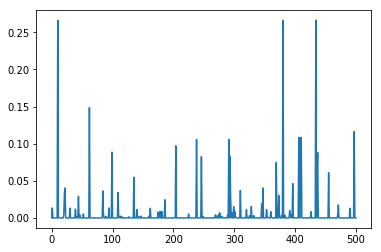

In [246]:
import matplotlib.pyplot as plt
plt.plot(list(range(len(article_rank))),article_rank)
plt.show()

In [247]:
rank_f=[0]
rank_t=[0]
rank_h=[0]


for i in range(1,inspect_article.sentence[-1]):
    #print(" ".join(inspect_article.word[inspect_article.sentence==i]))
    temp=np.array(article_rank)[inspect_article.sentence==i]
    rank_f.append(np.sum(temp)/(len(temp)+1))
    temp=np.array(article_rank_h)[inspect_article.sentence==i]
    rank_h.append(np.sum(temp)/(len(temp)+1))
    temp=np.array(article_rank_t)[inspect_article.sentence==i]
    rank_t.append(np.sum(temp)/(len(temp)+1))
    #print(rank[i])
print(sum(rank_f)/len(rank_f))
print(sum(rank_t)/len(rank_t))
print(sum(rank_h)/len(rank_h))
def get_blurry(mat):
    remat=mat
    for i in range(1,9):
        remat=remat+(np.roll(mat,i)+np.roll(mat,-i))*0.8**i
    return remat
def compare_two(m1,m2):
    temp=(m1-m2)
    return temp
    
rank_sp = get_blurry(compare_two(np.array(rank_f),0.5*(np.array(rank_t)+np.array(rank_h))))
avg_sp=sum(rank_f)/len(rank_f)*3-0.5*sum(rank_t)/len(rank_t)-0.5*sum(rank_h)/len(rank_h)

len_use=0
left=[]
for i in range(1,inspect_article.sentence[-1]):
    
    if(rank_sp[i]>avg_sp):
        print(" ".join(inspect_article.word[inspect_article.sentence==i]))
        
        len_use+=1
    else:
        left.append(" ".join(inspect_article.word[inspect_article.sentence==i]))
        print("=============",end="^")
    

0.004095375302733183
0.0035573761883616367
0.003028608640545169
=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^=============^　　在藍天 下 透光 的 花瓣 真的 很 美
　　接著 從 石<U + 5840 > 小路 走往 清水寺
這個 曲巷 真是 讓 人 看 不 膩
　　還有 在 店家 門口 的 蛇 傘 也是 我 很 喜歡 的 街景 布置
　　至於 寧寧 之 道上 的 櫻花 ..... 這樣 有 算 一分 嗎 ？ XD
　　走到 這邊 最 大 的 樂趣 是 逛街 和 推坑
同行 的 友人 在 此 荷包 受到 了 重傷 XD
　　例如 和 招喜屋 一起 的 手機 吊飾 店家
　　會讓 喜歡 可愛 又 精緻 的 小 東西 的 女生 荷包 大 失血
　　因為 清水寺 夜間 觀拜 要 開始 了
二三 年 <U + 5742 >上 滿 是 人潮
　　日落 時 的 老街 色調 很 美
可惜 人 多 到 看不到 路ＸＤ
　　這棵 在 當時 唯一 滿 開 的 枝 垂櫻 下面 （ 照片 詳見 網誌 ）
　　吸引 了 大量 的 人潮 聚集
人 多 到 比 櫻花 還要 壯觀 啊 ！
　　接著 就 到 〔 夢 咖啡 五龍閣 〕 吃 晚餐
=============^=============^=============^=============^=======


 28.57142857142857 %


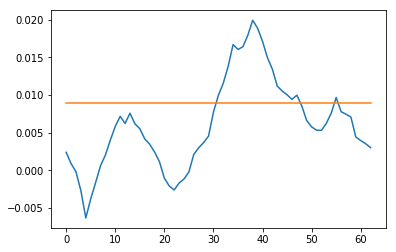

、 祇園 、 二 三 年 <U + 5742 > 時間 Thu 、 Aug、、 2 、 15:17:54 、 2012
　　無音樂 詳細 圖文 網誌 版 ：
　　http://blog.xuite.net/senha_ tactics/blog/62167108
　　結束 建仁寺 的 行程 後
由 花見小路 走往 清水寺
沿途 的 街景 充滿 了 京都 風情
很 適合
慢慢 散步
只是 賞 櫻季 的 人 有點 多 ～XD　
　
　　這時候 就算 艷陽 高照 也 不 覺得 熱
所以 很容易 會不小心 就 曬 黑 了
　　一路上 的 花況 仍然 是 稀稀落落 的
但是 只要 有 藍天
襯起 櫻花 就是 好看
　　也可以 很容易 的 拍到 透光 的 花瓣
　　經過 祇園 甲部 歌舞 練場 時
看到 大陸 客 一 車 一 車 的 載來
再 加上 驚人 的 門票 費用
　　就很 迅速 的 撤退 了 XD
　　八<U + 5742 >神社 的 人群 大都 集中 在 後面 的 圓山公園 那邊
　　雖然 櫻花 沒有 滿 開
市集 的 人潮 倒是 沒 受到 多 大 的 影響
仍是 絡繹不絕
　　生意 如何 呢 ？ 偷聽 了 一下 小販 們 之間 聊天 的 內容 ： 「 大不如前 。 」
　　大概 是 因為 花 開 得 還 不夠 盛
不足以 吸引 大量 的 觀光客 買 點 小吃 和 啤酒 在 櫻花 樹下 佇
足賞花 吧 ？
　　沒有 整 片 的 櫻花
看 特寫 其實 也 很 不錯 啊 ～ （ 自我安慰 中 ）
等待 清水寺 夜間 觀拜 開放 的 時間
　　夜櫻 的 燈光 璀璨
讓 人 難以忘懷 啊 ！
--
生活 記錄 遊記 隨 拍 分享 ：
http://www . plurk . com/senha
--
◆ 、 From : 、 118.160.80.249
→ 、 milingo : 你 確定 是 陸客 嗎 ? 你 去 的 時間 , 應該 還有 都 舞 , 是 日本 團體 去 的 、 08/02 、 15:20
→ 、 milingo : 陸客 應該 在 西陣織 會館 、 08/02 、 15:21
→ 、 senha : 嗯
因為 有 聽到 濃厚 的 大陸 腔 對話 XD 、 08/02 、 15:27
"
" x "


In [248]:
print("\n",len_use/len(rank_sp)*100,"%")
plt.plot(list(range(len(rank_sp))),rank_sp)
plt.plot(list(range(len(rank_sp))),avg_sp*np.ones(len(rank_sp)))
plt.plot()
plt.show()
for i in left:
    print(i)

### 從特定景點 tfidf 得到要用的詞，再從整體的tfidf 獲得分數


In [155]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_one_article_input=[]
three_dict=[]
for i in range(3):
    need_article=spotlist[i]
    for j in range(need_article.article[-1]):
        tfidf_one_article_input.append(" ".join(need_article.word[(need_article.article==j)*(get_str_tf(["a","n","nh","nf","nsf","v"],need_article))]))
    vectorizer1 =CountVectorizer()
    tfidf_article = vectorizer1.fit_transform(tfidf_one_article_input)
    articleword=np.array(vectorizer1.get_feature_names())
    tf_mat_article=tfidf_article.toarray()
    three_dict.append(create_dic(articleword[filter_ratio(tf_mat_article,0.01,1)],testword,tf_mat[i]))

In [156]:
three_dict[0]

{'12': 0.0024398538961786158,
 '2018': 0.0024398538961786158,
 '600yen': 0.004463069511187208,
 'bbs': 0.09113306654349582,
 'blog': 0.0015243665319698329,
 'cc': 0.09113306654349582,
 'com': 0.07545614333250672,
 'cp值': 0.0048797077923572315,
 'facebook': 0.01518884442391597,
 'feel': 0.0024398538961786158,
 'flickr': 0.037078061578488405,
 'food': 0.041655315437747274,
 'fubabytw': 0.0048797077923572315,
 'fw': 0.018298904221339618,
 'html': 0.015243665319698329,
 'http': 0.00441292801715709,
 'https': 0.0022865497979547493,
 'ig': 0.0024398538961786158,
 'instagram': 0.0020598923099160223,
 'japan': 0.07264229941872856,
 'jp': 0.0017651712068628362,
 'jpg': 0.06859649393864248,
 'jr': 0.0030898384648740335,
 'jr山手線': 0.0024398538961786158,
 'k5': 0.011329407704538124,
 'maruko': 0.003659780844267924,
 'menu': 0.0020598923099160223,
 'no': 0.003659780844267924,
 'ok': 0.0030487330639396657,
 'photos': 0.037078061578488405,
 'ptt': 0.09113306654349582,
 'qq': 0.009905768102553893,
 'q

In [80]:
temp_dic["藥妝"]

0.03544778529881435

### 類似景點 tfidf 類似程度

## 整體tfidf

In [100]:
tfidf_input=[]
for i ,j in zip(spotlist,range(len(spotlist))):
    try:
        tfidf_input.append(get_str(["a","n","nh","nf","nsf","v"],i))
    except:
        tfidf_input.append("ng ng ng")
        print(dirs[j])
vectorizer = TfidfVectorizer()     
tfidf = vectorizer.fit_transform(tfidf_input)
testword=np.array(vectorizer.get_feature_names())
tf_mat=tfidf.toarray()

In [101]:
print((np.argsort(tf_mat[1])))
print(type(testword))


[18703  8172  8173 ...  9417  4340  6914]
<class 'numpy.ndarray'>


In [21]:
def show_top_word(tf,top_n,testword_):
    _testword_=np.array(testword_)
    print(_testword_[np.flip(np.argsort(tf),0)][0:top_n])
show_top_word(tf_mat[1],200,testword)

NameError: name 'tf_mat' is not defined

__[blog_排組](https://www.cnblogs.com/alexkh/archive/2013/03/20/2971533.html)__

In [29]:
test=spot_tfidf(tf_mat,testword,dirs)
need_=test.filter_ratio(0.01,1)
test.mat=test.mat[:,need_]
test.word=test.word[need_]

In [35]:
test.mat.shape

(505, 16877)

In [37]:

"""import pandas as pd 
df = pd.DataFrame(test.mat)
df.to_csv("D:/data/final_project/mat.csv",header=None,index=False)
df = pd.DataFrame(test.word)
df.to_csv("D:/data/final_project/word.csv",header=None,index=False)
df = pd.DataFrame(np.array(dirs))
df.to_csv("D:/data/final_project/spot.csv",header=None,index=False)"""

In [31]:
show_top_word(test.most_similar(test.spword_tf(["世豊商店.txt","合羽橋道具街 .txt","巢鴨地藏通商店街 .txt"])),30,dirs)

['千日前道具屋筋商店街.txt' '京都御苑.txt' '大須觀音.txt' '合羽橋道具街 .txt' '水鏡天滿宮 .txt'
 '心齋橋筋商店街.txt' '新京極商店街.txt' '東京站一番街 .txt' '天神橋筋商店街.txt' '戎橋.txt'
 '神戶港塔 .txt' '巢鴨地藏通商店街 .txt' '橫濱元町商店街.txt' '大須商店街.txt' '吉祥寺.txt'
 '大阪生活今昔館 .txt' '原宿.txt' '三宮中心街 .txt' '阿美橫丁 .txt' '輕井澤王子outlet .txt'
 '臨空城Outlet .txt' '增上寺 .txt' '狸小路.txt' '免稅店DFS.txt' '道頓堀水上觀光船.txt'
 '仲見世通.txt' '常寂光寺.txt' '四條河原町.txt' '御殿場 Premium Outlet .txt' '阿蘇神社.txt']


In [32]:
show_top_word(test.most_similar(test.spword_tf(["根津神社.txt","北海道神宮.txt","上賀茂神社.txt","八坂神社.txt","出雲大社.txt"],batch=4)),30,dirs)

['川越冰川神社 .txt' '靖國神社 .txt' '上賀茂神社.txt' '下鴨神社.txt' '八坂神社.txt' '根津神社.txt'
 '嚴島神社 .txt' '平野神社.txt' '神樂坂.txt' '宮島.txt' '淺草神社 .txt' '櫛田神社.txt'
 '晴明神社.txt' '冰室神社 .txt' '千本鳥居.txt' '地主神社.txt' '伏見稻荷大社.txt' '千鳥之淵 .txt'
 '波上宮.txt' '水前寺成趣園.txt' '出雲大社.txt' '高千穗峽 .txt' '鬼之洗濯板 .txt' '江之島 .txt'
 '貴船神社.txt' '清水寺.txt' '野宮神社.txt' '祇園.txt' '圓山公園 .txt' '難波八阪神社.txt']


In [33]:
show_top_word(test.most_similar(test.spword_tf(["層雲峽 .txt","十和田湖.txt","嵐山.txt","摩周湖.txt"],batch=2)),30,dirs)

['華嚴瀑布 .txt' '層雲峽 .txt' '中禪寺湖 .txt' '十和田湖.txt' '白絲瀑布 .txt' '奧入瀨溪 .txt'
 '京都御苑.txt' '草津溫泉 .txt' '水鏡天滿宮 .txt' '常寂光寺.txt' '白鬚瀑布 .txt' '銀山溫泉 .txt'
 '八甲田山.txt' '知床五湖.txt' '高千穗峽 .txt' '永觀堂.txt' '霧島神宮.txt' '道後溫泉 .txt'
 '御殿場 Premium Outlet .txt' '定山溪 .txt' '別府地獄.txt' '河口湖.txt' '金閣寺.txt'
 '摩周湖.txt' '高尾山.txt' '嵐山.txt' '二荒山神社.txt' '青池 .txt' '雪之大谷 .txt' '上高地.txt']


In [135]:
"""with open("./data/newword.txt","r",encoding="utf8") as file:
    temps=file.read()
    temps=temps.replace("\t"," ")
    temps=temps.replace("  "," ")
    addlist=temps.split("\n")
#addlist=["道敦堀 nsf"]#自定新词
spot=[]
for i in addlist:    
    k=i.split(" ")
    spot.append(k[0])
spot"""

'with open("./data/newword.txt","r",encoding="utf8") as file:\n    temps=file.read()\n    temps=temps.replace("\t"," ")\n    temps=temps.replace("  "," ")\n    addlist=temps.split("\n")\n#addlist=["道敦堀 nsf"]#自定新词\nspot=[]\nfor i in addlist:    \n    k=i.split(" ")\n    spot.append(k[0])\nspot'

In [136]:
l=1
name="a"
newtxtlist=[]
for i in range(1,l+1):
    with open("./data/article/"+str(name)+" ("+str(i)+").txt","r",encoding="utf8") as file:
        newtxtlist.append(decode_txt(file.read()))

In [137]:
class singleword:
    def __init__(self,L):
        self.word=L[0]
        self.id=L[1]
        self.type=L[2]
        self.pword=L[5]
        self.linktype=L[3]
        self.tag=[]
    def show(self):
        print(self.word,self.type,self.index,"  ",self.pword,self.linktype,self.tag)
    def setindex(self,p):
        self.index=p

In [138]:
newtxtlist

[[<__main__.singleword at 0x1d4e54a8860>,
  ...]]

In [139]:
# input
from sklearn.feature_extraction.text import CountVectorizer
def counter(word,by=0):
    vectorizer = CountVectorizer(ngram_range=(1, 1), lowercase=False, token_pattern = r'\b\w+\b', min_df = 1)
    if(by==0):
        word=[" ".join(x.split("")) for x in word]
        tf_mat = vectorizer.fit_transform(word)
    else:
        temp=[]
        for i in word:
            s=""
            for x in i:
                if (x.type in by):
                    s=s+","+x.word
                    x.show()
            temp.append(s)
        tf_mat = vectorizer.fit_transform(temp)
    return (vectorizer.get_feature_names(),tf_mat.toarray())


In [140]:
t=counter([b.content],by=["n","nsf"])

NameError: name 'b' is not defined

In [ ]:
t[1]

In [ ]:
class article_first_layer:
    def __init__(self,wordveclist,d="article"):
        self.wordveclist=wordveclist
        self.page=0
        self.wordvec=wordveclist[self.page]
        self.indexlen=len(self.wordvec)-1
        self.point=0
        self.dtype=d
    def nextpage(self):
        if(self.page<len(self.wordveclist)-1):
            page+=1
            self.wordvec=wordveclist[self.page]
            self.point=0
            return True
        else:
            return False
    def to_standard_type(self):
        
        return [singleword([0,0,0,0,0,0,0])]+[singleword(self.wordvec[i]) for i in range(1,len(self.wordvec))]
    """
    def action(self,x=[False]):
        if(x[0]=="W"):
            return (self.wordvec[x[1]][0])
        elif(x[0]=="T"):
            return (self.wordvec[x[1]][2])
        elif(x[0]=="C"):
            return (self.wordvec[x[1]][0],self.wordvec[x[1]][3],self.wordvec[x[1]][4])
        elif(x[0]=="N"):
            if(self.point<self.indexlen):
                self.point+=1
                return point
            else:
                return False    
        elif(x[0]=="B"):
            if(self.point<self.indexlen):
                self.point+=1
                return point
            else:
                return False
        else:
            print("somewhere got wrong")
            """

In [ ]:
class article_second_layer_sentence:
    def read_sentence(self,pointer):
        p=pointer
        re=[]
        while(True):]
            if(p<=1 or p>=self.contentlen): 
                break
            elif(self.sp_type(p)!=1):
                p-=1
            else:
                p+=1
                break
        while(True):
            if(p>=self.contentlen):
                p=-1
                print("out of range")
                break
            elif(self.sp_type(p)!=1):
                re.append(self.content[p])
            else:
                break
            p+=1
        return (re,p)
    def sp_type(self,wordp):
        word=self.content[wordp]
        
        if(word.word=="," or word.word=="。" or word.word=="，"):
            return 1
        else:
            return 0

In [ ]:
class article_second_layer(article_second_layer_sentence):
    def __init__(self,firstlayer):
        self.content=firstlayer.to_standard_type()
        self.contentlen=len(self.content)
        #self.content=article_first_layer(newtxtlist)
    def show_sentence(self,s):
        print([x.word for x in s[0]])
    def wordlink(self,link=["ns","n","nsf "]):
        
        
        


In [ ]:
a=article_first_layer(newtxtlist)
b=article_second_layer(a)

In [ ]:
b.show_sentence(b.read_sentence(7890))

In [ ]:
for i in range(len(b.content)):
    print(i,end=" ")
    b.content[i].show()

In [ ]:
for i in b.content:
    if(i.word in spot or i.type=="nsf" or i.type== "ns"):
        print(i.word)
    